# 21M.387 Fundamentals of Music Processing
## Lab8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['image.interpolation'] = 'nearest'

fmp.documentation_button()

## Exercise 1

- Find a song or two on your computer.
- Use Audacity to convert these songs to 22,050k, mono, wav files.
- Make the filename descriptive, like `<artist>_<songname>.wav`
- Upload with [Dropbox Upload](https://www.dropbox.com/request/26InY3OJBHT3aHwSDTQq)


In [2]:
connect_to_queue()

## Exercise 2a

This exercise explores hashing and hash lists.

`fav_nums` is a list of people and their favorite number.

In [3]:
fav_nums = [("alice", 1), ("bob",17), ("claire",42), ("dan",15), ("erica",3), ("frank", 19)]

Write the function `hash_of_name(name)` that coverts (hashes) a name to a number as follows:
- Sum all the ASCII values of the characters in the name
- You can use the function `ord` for that
- Take the modulo 10 of that number

Print the hash values for each name in the above list.

In [4]:
def hash_of_name(name):
    return np.sum([ord(c) for c in name]) % 10
for i in range(len(fav_nums)):
    print(fav_nums[i][0],hash_of_name(fav_nums[i][0]))

alice 0
bob 7
claire 4
dan 7
erica 6
frank 0


## Exercise 2b

Now, write code that populates a new dictionary `hash_list` such that:
- the keys are the hash values of the names
- the value of each key is a list of all the favorite numbers corresponding to the hash of that name

In [5]:
hash_list = {}
for name in fav_nums:
    if hash_of_name(name[0]) not in hash_list:
        hash_list[hash_of_name(name[0])] = [name[1]]
    else:
        hash_list[hash_of_name(name[0])].append(name[1])
print(hash_list)

{0: [1, 19], 7: [17, 15], 4: [42], 6: [3]}


The expected answer is: `{0: [1, 19], 7: [17, 15], 4: [42], 6: [3]}`

In [6]:
connect_to_queue()

## Exercise 3a

Load the image below.  
Images come into `numpy` as 3D matrices $(H \times W \times 4)$ where the 3rd dimension has the values for pixel color: R, G, B, A. (A is alpha, i.e., the opacity of the pixel).

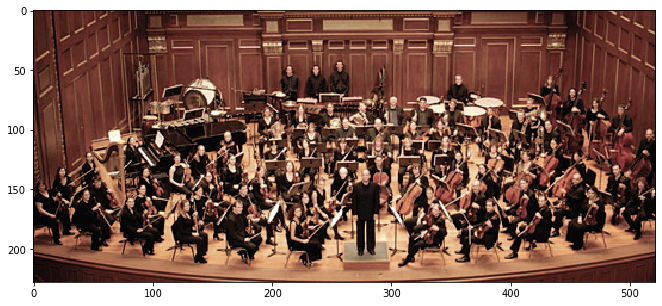

In [7]:
# load image
import matplotlib.image
img_clr = matplotlib.image.imread("data/bmop.png")
plt.imshow(img_clr)
plt.show()

Create a 2D grayscale matrix by averaging R, G, B into one value (using `np.mean`).  
Plot this grayscale image. To see actual grayscale, use `cmap='gray'`.

In [8]:
img_clr.shape

(228, 522, 4)

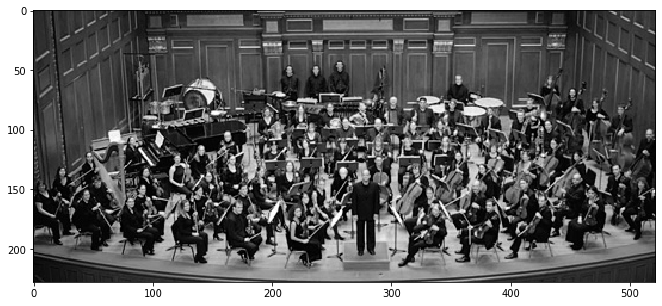

In [9]:
avg = np.mean(img_clr[:,:,:3],axis = 2)
plt.imshow(avg,cmap='gray')

In [10]:
connect_to_queue()

## Exercise 3b

For this greyscale image (matrix $\mathbf{X}$), we will find the points of local maxima.

- First, apply the function `maximum_filter` from `scipy.ndimage.filters` to form $\mathbf{X}_{\text{max}}$.
- Each point in the filtered image is set to the maximum value in a zone surrounding the original point.
- You need to specify a local zone size of (height,width) for this filter. Use `(20,40)`.  
- Plot $\mathbf{X}_{\text{max}}$.  

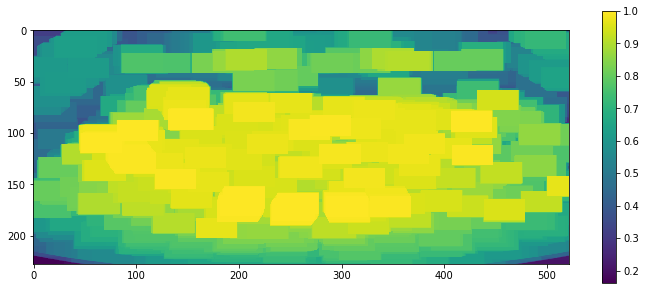

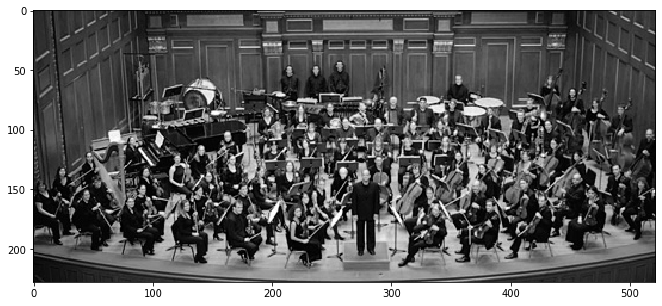

In [11]:
from scipy.ndimage.filters import maximum_filter
Xmax = maximum_filter(avg,size = (20,40))
plt.imshow(Xmax)
plt.colorbar();
plt.show()
plt.imshow(avg,cmap='gray')

In [12]:
connect_to_queue()

## Exercise 3c

A point $(x,y)$ is a local maximum (a peak) if $\mathbf{X}[y,x] = \mathbf{X}_{\text{max}}[y,x]$.  
- Find all the peaks in the image as $(x,y)$ coordinates.  
- Format these points as a $P \times 2$ matrix representing $P$ points where each row is the point coordinates $(x,y)$.
- The function `np.where` is useful here. It returns the indexes of non-zero values of a boolean array.
- Plot the greyscale image and the points on top as red dots.

125

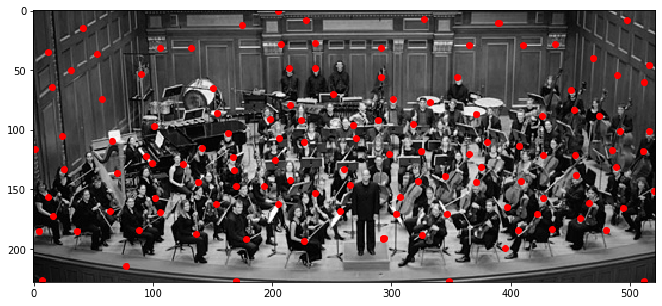

In [13]:
peaks = np.where(avg == Xmax)
P = [(x, y) for x in peaks[0] for y in peaks[1]]
plt.imshow(avg,cmap='gray')
plt.plot(peaks[1], peaks[0], 'ro')


len(peaks[0])

How many points where generated? Should be 125.

In [14]:
connect_to_queue()

## Exercise 4

Write the function `find_top_n_peaks(x, n, win_len)` to find the $n$ highest peaks of a 1D signal.

Inputs:
- `x`: $x$, the input signal
- `n`: $n$, the number of peaks to return
- `win_len`: $L_R$, the length of a window centered around a found peak that should be removed from consideration when locating the next peak.

Outputs:
- a list of index values corresponding to peaks of $x$.

Strategy:
- Find the maximum value
- Modify the signal to squash out a region of length $L_R$ around that maximum value (set it to the minimum of the original signal)
- Repeat

In [15]:
def find_top_n_peaks(x, n, win_len):
    orig_min = np.min(x)
    ind = []
    z = x.copy()
    z = np.pad(z,win_len//2,mode='constant')
    for i in range(n):
        m = np.argmax(z)
        z[m-(win_len//2):m+(win_len//2)+1] = orig_min
        ind.append(m)
    ind = np.array(ind)
    ind = ind - win_len//2
    return ind
        

- Test the function with the data below.  
- Look for the top 4 peaks. Plot the function and the peaks on the same figure.
- Try various values of `win_len` to get a feel for how it works.

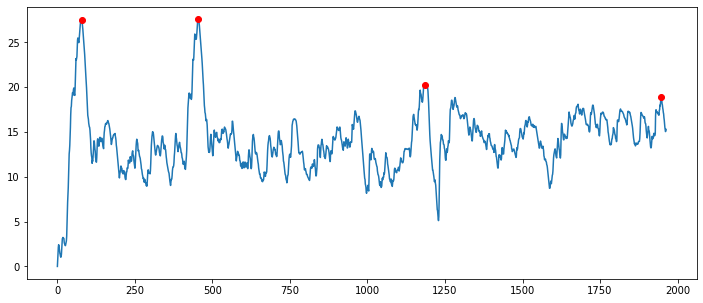

In [16]:
sig = np.load("data/lab_5.npy")
peaks4 = find_top_n_peaks(sig,4,100)
plt.plot(sig)
plt.plot(peaks4, sig[peaks4],'ro')


In [17]:
connect_to_queue('checkoff')

## Exercise 5

For the next two exercises, we'll come back from breakout rooms and run some tests with the audio files uploaded by all the students. You can follow along and run the code yourself if you wish.

We will now create a fingerprint database with all the uploaded songs to try search by audio identification.

The songs are located [here](https://www.dropbox.com/sh/8n4ajkkjlzemrjw/AACjc_GVblrU4UKCz6mEOgL0a?dl=0) if you wish to copy them to your local drive.

In [18]:
import glob
files = glob.glob('/Users/eran/Dropbox/MIT/21M387/*.wav')

In [19]:
# create the fingerprint database
fp_db = fmp.FingerprintDB()
for f in files:
    fp_db.add(f)

Now, we'll create some queries over Zoom.

In [20]:
query = fmp.load_wav("audio/query1.wav")
fs = 22050.
ipd.Audio(query, rate=fs)

In [21]:
results, count = fp_db.query(query, 3)
for r in results:
    print(r)
    
print(count)

ValueError: attempt to get argmax of an empty sequence

## Exercise 6

With the same set of files, we will now run the audio matching algorithm.

In [ ]:
match_db = fmp.MatchDB()
for f in files:
    match_db.add(f)

In [ ]:
query = fmp.load_wav("audio/query1.wav")
ipd.Audio(query, rate=fs)

In [ ]:
results = match_db.query(query, 4)
@interact(r=(0,len(results)-1))
def play_result(r=0):
    r = results[r]
    print(f'{r[0]}\nspan: {r[1]:.1f} to {r[2]:.1f} seconds\ncost: {r[3]:.2f}')
    snd = fmp.load_wav(r[0], r[1], r[2])
    return ipd.Audio(snd, rate = fs)